TIME SERIES ANALYSIS - SENSOR DATA

Importing the dataset:

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('sensor_data.csv')


Converting Date into Timestamp

In [43]:
data['date'] = pd.to_datetime(data['date'])


In [44]:
ts = data.set_index(['date'])


In [45]:
ts.head()


,passenger_count
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Visualising the graph:

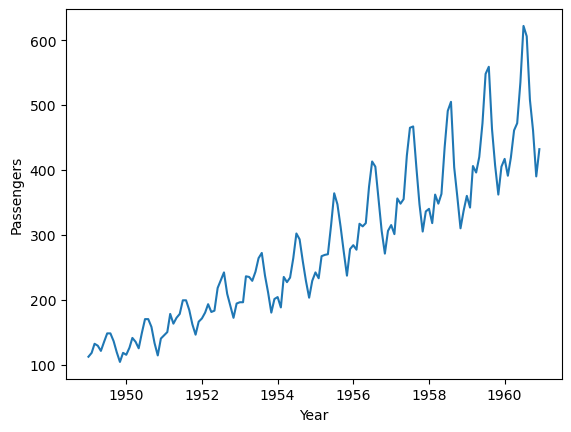

In [46]:
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.plot(ts)


Statistics for the give data - Mean & Standard Deviation:

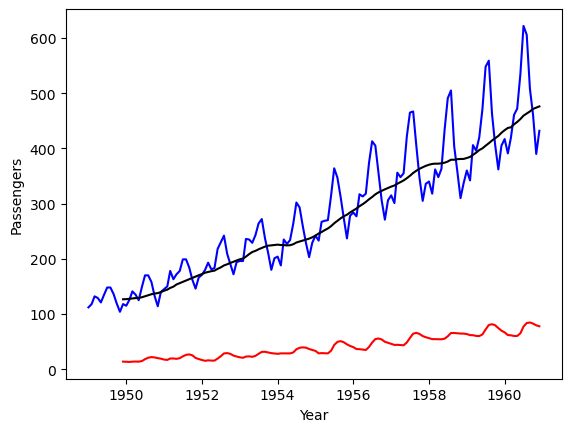

In [47]:
ts_mean = ts.rolling(window=12).mean()
ts_std = ts.rolling(window=12).std()

plt.xlabel("Year")
plt.ylabel("Passengers")
plt.plot(ts, c='blue')
plt.plot(ts_mean, c='black')
plt.plot(ts_std, c='red')


Predicting using the ARIMA Model:

In [48]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts, seasonal_order=(2,2,1,12))
model_fit = model.fit()

c:\Users\Pravalika Arunkumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Pravalika Arunkumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Pravalika Arunkumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [49]:
pred = model_fit.forecast(24)

In [50]:
pred = pd.DataFrame(res)
pred.columns=['passenger_count']
ts_pred = pd.DataFrame(ts)
ts_pred = ts_pred.append(pred)

C:\Users\Pravalika Arunkumar\AppData\Local\Temp\ipykernel_14796\2944788049.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ts_pred = ts_pred.append(pred)


Prediction Visualisation:

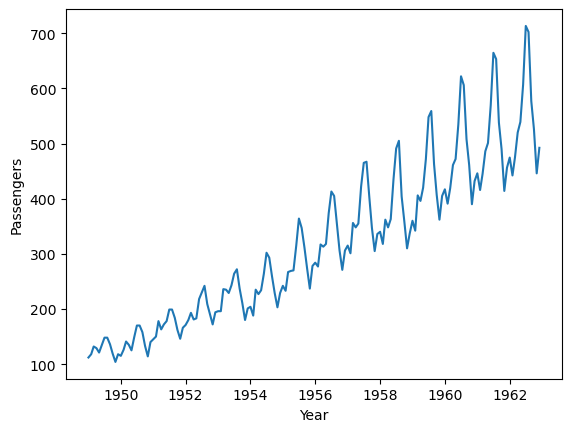

In [51]:
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.plot(ts_pred)